# Explore product descriptions

Author: Felicia Liu

Date: August 12, 2019

In [125]:
from copy import deepcopy
import json
import pprint
import random

from bs4 import BeautifulSoup
import numpy as np
import textacy
from textacy import preprocess
from textacy.vsm import vectorizers
import textacy.tm

In [2]:
with open('product_data.json', 'r') as file:
    data = json.load(file)

In [ ]:
product_descriptions = []
labels = []
for index, product in enumerate(data):
    if 'description' in product:
        product_descriptions.append(product['description'])
    else:
        print("Missing description for product {}".format(index))


In [6]:
product_descriptions

["Supersoft speckled French terry makes this (tush covering!) turtleneck-sweatshirt hybrid the layering piece you'll want to wear to the gym, to lunch, to, well, everywhere this winter. Loose fit. Body length: 27 1/2. Cotton. Import.",
 'Consider this embroidered layer your new dressy sweatshirt this winter. Slim fit. Body length: 24. Cotton. Import.',
 "Shop the Men's Slim American Pima Cotton Oxford Shirt With Mechanical Stretch at J.Crew and see the entire selection of Men's Casual Shirts. Free Shipping Available.",
 "Shop the Women's Off-The-Shoulder Foldover Top at J.Crew and see the entire selection of Women's Knits. Free Shipping Available.",
 "Shop the Women's Ruffle Plunge V-Neck One-Piece Swimsuit at J.Crew and see the entire selection of Women's Swimwear. Free Shipping Available.",
 "Shop the Women's Strappy Knit Midi Dress at J.Crew and see the entire selection of Women's Swimwear. Free Shipping Available.",
 "Shop the Women's Mixed Stripe T-Shirt at J.Crew and see the enti

In [9]:
sample = random.sample(product_descriptions, 20)

Inspecting a random selection of product descriptions. Some descriptions are quite clean, but there are a number of descriptions that are either empty, not in English, or contain messy html.

In [13]:
for text in sample:
    print('*****')
    pprint.pprint(text)

*****
("Shop the Women's Tall Point Sur High-Rise Slim Boyfriend Jean In Destructed "
 "White Denim at J.Crew and see the entire selection of Women's Jeans. Free "
 'Shipping Available.')
*****
('Shop the Petite Boyfriend Shirt In Crimson Petal Plaid at JCrew.com and see '
 "our entire selection of Women's Shirts.")
*****
("Shop the Women's Signet Hobo Bag In Italian Leather at J.Crew and see the "
 "entire selection of Women's Bags. Free Shipping Available.")
*****
("Shop the Boys' New York Mets Jersey at J.Crew and see the entire selection "
 "of Boys' Tops. Free Shipping Available.")
*****
("Shop the Women's Surf Hipster Bikini Botton In Happy Seersucker at J.Crew "
 "and see the entire selection of Women's Swimwear. Free Shipping Available.")
*****
("Shop the Girls' Everyday Leggings In Metallic at J.Crew and see the entire "
 "selection of Girls' Pants. Free Shipping Available.")
*****
("Shop the Women's Petite Long Tie-Waist Jacket at J.Crew and see the entire "
 "selection of Wo

# Cleaning

In [35]:
preprocessed_descriptions = []
for index, description in enumerate(sample):
    print('************ {} ************'.format(index))
    print(description)
    print('******')
    if bool(BeautifulSoup(description, "html.parser").find()):
#         print('is html')
        soup = BeautifulSoup(description)
        description = soup.text
    preprocessed = description.replace('\n', ' ')
    preprocessed = preprocess.normalize_whitespace(preprocessed) 
    print(preprocessed)

************ 0 ************
Shop the Women's Tall Point Sur High-Rise Slim Boyfriend Jean In Destructed White Denim at J.Crew and see the entire selection of Women's Jeans. Free Shipping Available.
******
Shop the Women's Tall Point Sur High-Rise Slim Boyfriend Jean In Destructed White Denim at J.Crew and see the entire selection of Women's Jeans. Free Shipping Available.
************ 1 ************
Shop the Petite Boyfriend Shirt In Crimson Petal Plaid at JCrew.com and see our entire selection of Women's Shirts.
******
Shop the Petite Boyfriend Shirt In Crimson Petal Plaid at JCrew.com and see our entire selection of Women's Shirts.
************ 2 ************
Shop the Women's Signet Hobo Bag In Italian Leather at J.Crew and see the entire selection of Women's Bags. Free Shipping Available.
******
Shop the Women's Signet Hobo Bag In Italian Leather at J.Crew and see the entire selection of Women's Bags. Free Shipping Available.
************ 3 ************
Shop the Boys' New York Mets 

In [97]:
def preprocess_descriptions(descriptions, filter_words):
    preprocessed_descriptions = []
    for description in descriptions:
        if bool(BeautifulSoup(description, "html.parser").find()):
            soup = BeautifulSoup(description)
            description = soup.text
        preprocessed = description.replace('\n', ' ')
        preprocessed = preprocessed.lower()
        for word in filter_words:
            preprocessed = preprocessed.replace(word.lower(), ' ')
        preprocessed = preprocess.normalize_whitespace(preprocessed)
        preprocessed_descriptions.append(preprocessed)
    return preprocessed_descriptions

In [98]:
descriptions = preprocess_descriptions(product_descriptions, filter_words)

In [99]:
corpus = textacy.Corpus("en_core_web_sm", data=descriptions)

In [100]:
corpus

Corpus(1000 docs, 41010 tokens)

In [101]:
def tokenize(corpus):
    tokenized_docs = (doc._.to_terms_list(ngrams=1, entities=True, as_strings=True) for doc in corpus)
    return tokenized_docs

In [102]:
tokenized_docs = (doc._.to_terms_list(ngrams=1, entities=True, as_strings=True) for doc in corpus)

In [103]:
vectorizer = vectorizers.Vectorizer(apply_idf=True, norm="l2", min_df=3, max_df=0.95)

In [104]:
doc_term_matrix = vectorizer.fit_transform(tokenized_docs)

In [105]:
topic_model = textacy.tm.TopicModel("nmf", n_topics=11)
topic_model.fit(doc_term_matrix)
doc_topic_matrix = topic_model.transform(doc_term_matrix)

In [109]:
doc_topic_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.00157066,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00362018,
        0.        ],
       [0.        , 0.08426548, 0.15078034, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00050765, 0.00844573, ..., 0.0002294 , 0.00226412,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [92]:
doc_topic_matrix.shape

(1000, 11)

First pass with topic modeling. Most of the top terms are clouded with "free shipping available on entire selection". In my next pass I remove these.

In [65]:
# for topic_index, top_terms in topic_model.top_topic_terms(vectorizer.id_to_term, top_n=15):
#     print("topic", topic_index, ":", " ".join(top_terms))

topic 0 : Women J.Crew shipping free selection entire shop available free shipping available earring Bags Jacket Jackets Women 's earring jewelry
topic 1 : Shirts Women Women 's Shirts Button free shipping available Shirt entire selection shop shipping Petite free J.Crew Tall available
topic 2 : import wash machine length body Cotton fit online wear perfect dry pretty silk 1/2 shirt
topic 3 : Men men J.Crew shipping entire selection free shop available Footwear Short Accessories men 's Accessories free shipping available Sleeve
topic 4 : Knits Women 's Knits Women T free shipping available Shirt J.Crew shipping free entire selection shop available Tank Tie
topic 5 : Women 's Swimwear Swimwear Women Bikini J.Crew shipping entire free selection shop available Playa Swimsuit Stripe Tie
topic 6 : Dresses Dress Women J.Crew shipping free entire selection shop available Sheath Mercantile Tall Floral Sleeve
topic 7 : de à et en avec la pour Contenu soin + cm un Taille des nettoyer
topic 8 : G

In [66]:
filter_words = ['J.Crew', 'shipping', 'free', 'available', 'entire', 'selection']

Second pass with topic modeling.

In [93]:
# for topic_index, top_terms in topic_model.top_topic_terms(vectorizer.id_to_term, top_n=15):
#     print("topic", topic_index, ":", " ".join(top_terms))

topic 0 : woman knit shop jacket tank t tie stripe bag petite sweatshirt active blazer tote long
topic 1 : shirt woman button tall shop petite perfect popover slim sleeve stretch stripe linen t classic
topic 2 : man shop short footwear accessory inch sleeve leather sweater tie hoodie tee bag boot stretch
topic 3 : cotton wash import machine length body fit hand size wear online dry silk pretty rise
topic 4 : dress woman shop sheath mercantile tall floral petite sleeve portfolio wrap eyelet tweed midi flutter
topic 5 : pant woman shop stretch wool suit chino tall jcrew.com petite crop leg 120 seaside wide
topic 6 : \- de à en + et la avec pour contenu soin cm taille nettoyer un
topic 7 : girl accessory shop top watermelon t print set dress flutter pajama charm jacket necklace blockprints&trade
topic 8 : woman swimwear bikini shop playa swimsuit one stripe piece tie ruche shoulder seersucker print rickrack
topic 9 : boy top jersey t shop shirt crewcut york tee henley ringer new short san

Iterating on topic modeling.

In [106]:
for topic_index, top_terms in topic_model.top_topic_terms(vectorizer.id_to_term, top_n=15):
    print("topic", topic_index, ":", " ".join(top_terms))

topic 0 : jacket woman petite downtown field shop blazer outerwear rainjacket long waist uncoated tie garment denim
topic 1 : shirt woman button shop tall petite perfect popover slim boy sleeve stretch stripe linen t
topic 2 : man shop short footwear accessory inch sleeve leather sweater tie hoodie tee bag boot stretch
topic 3 : cotton wash import machine length body fit hand size wear online dry silk pretty rise
topic 4 : dress woman shop sheath mercantile tall floral petite sleeve portfolio wrap eyelet tweed midi flutter
topic 5 : pant woman shop stretch wool suit chino tall jcrew.com petite crop leg 120 seaside point
topic 6 : \- de à en + et la avec pour contenu soin cm taille nettoyer un
topic 7 : girl accessory shop top t watermelon print dress set boy flutter pajama charm crewcut necklace
topic 8 : woman swimwear bikini shop playa stripe swimsuit one piece tie ruche shoulder seersucker underwire print
topic 9 : woman knit shop t tank stripe active tie sweatshirt bag shirt supima

In [107]:
for topic_idx, top_docs in topic_model.top_topic_docs(doc_topic_matrix, topics=list(range(11)), top_n=5):
    print("####", topic_idx, "####")
    for j in top_docs:
        print("************")
        print(corpus[j])

#### 0 ####
************
shop the women's petite quilted downtown field jacket at and see the of women's jackets. .
************
shop the women's petite long tie-waist jacket at and see the of women's jackets. .
************
shop the women's petite long tie-waist jacket at and see the of women's jackets. .
************
shop the women's petite long tie-waist jacket at and see the of women's jackets. .
************
shop the women's petite uncoated downtown field jacket at and see the of women's jackets. .
#### 1 ####
************
shop the women's tall slim perfect shirt in stretch cotton at and see the of women's button-down shirts. .
************
shop the women's tall slim perfect shirt in stretch cotton at and see the of women's button-down shirts. .
************
shop the women's tall short-sleeve button-up shirt in stripe at and see the of women's button-down shirts. .
************
shop the women's tall stretch perfect shirt at and see the of women's shirts. .
************
shop the wo

Topic 0: Tops

Topic 1: Tops

Topic 2: Mens items (clothing and accessories)

Topic 3: Tops

Topic 4: Dresses

Topic 5: Jeans

Topic 6: French text

Topic 7: Girls items (clothing and accessories)

Topic 8: Swimwear

Topic 9: Tops

Topic 10: Accessories

In [137]:
topic2label = {0: 'Tops', 1: 'Tops', 2: '', 3: 'Tops', 4: 'Dresses', 5: 'Jeans', 6: 'Other', 7: 'Other', 8: 'Swimwear', 9: 'Tops', 10: 'Accessories'}

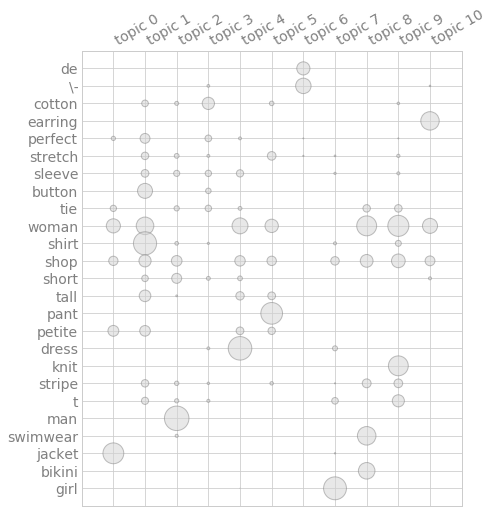

In [108]:
topic_model.termite_plot(doc_term_matrix, vectorizer.id_to_term, topics=-1,  n_terms=25, sort_terms_by="seriation")

In [121]:
labels = np.argmax(doc_topic_matrix, axis=1)

In [122]:
labels

array([ 3,  3,  2,  9,  8,  4,  9,  3,  3,  3,  9,  9,  9,  9,  9,  3,  9,
        9,  9,  6,  6,  6,  3,  8,  8,  9,  8,  3,  8,  8,  8,  8,  3,  8,
        8,  8,  8,  8,  9,  8,  8,  8,  3,  9,  9,  8,  8,  8,  8,  8,  3,
        3,  6,  6,  6, 10,  9,  9,  9,  9,  8,  9,  9,  9,  8,  5,  9,  9,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  6,  1,  1,  1,  1,  1,  9,  9,
        1,  3,  9,  3,  1,  3,  1,  1,  1,  3,  6,  9,  3,  9,  9,  8,  8,
        3,  8,  8,  3,  9,  8,  9,  8,  8,  8,  9,  8,  7,  7,  0,  1,  1,
        9,  1,  8,  1,  3,  3,  3,  5,  3,  3,  7,  1,  2,  7,  7,  1,  1,
        1,  7,  6,  6,  6,  6,  3,  6,  6,  3,  9,  5,  9,  9,  3,  9,  9,
        9,  9,  9,  8,  9,  0,  8, 10,  1,  3,  9,  9,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  9,  9,  5,  3,  0,
        3,  8, 10, 10,  9,  0,  0,  9,  1,  9,  3,  9,  5,  0,  1,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  4,  4,  4,  4,  4,  9,  9,  4,  4,  4,
        3,  3,  4,  3,  4

In [126]:
data_copy = deepcopy(data)

for product_data, label in zip(data_copy, labels):
    product_data['label'] = topic2label[label]

# with open('product_data_prelabeled.json', 'w') as file:
#     data = json.load(file)

In [132]:
data_copy

[{'images_url': 'https://www.jcrew.com/s7-img-facade/H3588_PK6317_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200',
  'description': "Supersoft speckled French terry makes this (tush covering!) turtleneck-sweatshirt hybrid the layering piece you'll want to wear to the gym, to lunch, to, well, everywhere this winter. Loose fit. Body length: 27 1/2. Cotton. Import.",
  'label': 'Tops'},
 {'images_url': 'https://www.jcrew.com/s7-img-facade/H2092_BL8133_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200',
  'description': 'Consider this embroidered layer your new dressy sweatshirt this winter. Slim fit. Body length: 24. Cotton. Import.',
  'label': 'Tops'},
 {'images_url': 'https://www.jcrew.com/s7-img-facade/H4702_WX0598_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200',
  'description': "Shop the Men's Slim American Pima Cotton Oxford Shirt With Mechanical Stretch at J.Crew and see the entire selection of Men's Casual Shirts. Free Shippin

In [138]:
with open('product_data_prelabeled.json', 'w') as outfile:
    json.dump(data_copy, outfile, indent=4)